In [97]:
import pandas as pd
import numpy as np

In [98]:
train_df = pd.read_csv('train.csv', sep=',') 
test_x = pd.read_csv('test.csv', sep=',') 

In [99]:
print(train_df.head())
print(test_x.head())

                     ID     sex Aged Married TotalDependents  ServiceSpan  \
0  B60LHTZLLPFU4IULNPUF  Female   No      No             Yes           48   
1  1RUJ7ONYZHYTWKOKO1SD    Male   No     Yes              No           45   
2  DZ9EEOQWSN0MYCBUPAM5    Male  Yes     Yes              No           59   
3  YZ43L1UQUQACTL1PXXZG    Male   No      No              No           14   
4  6P28152QGF60PDLSCB9M  Female   No     Yes             Yes           25   

  MobileService       4GService CyberProtection HardwareSupport  \
0           Yes  Wifi Broadband              No             Yes   
1           Yes  Wifi Broadband              No              No   
2           Yes  Wifi Broadband             Yes              No   
3           Yes  Wifi Broadband              No              No   
4           Yes  Wifi Broadband              No             Yes   

  TechnicalAssistance FilmSubscription SettlementProcess  QuarterlyPayment  \
0                 Yes               No             Check

In [100]:
train_df.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [101]:
#Exploring categorical data
cat_col = []
for col_name in train_df.columns:
    if train_df[col_name].dtypes == 'object' and col_name!='ID' :
        cat_col.append(col_name)
        unique_cat = len(train_df[col_name].unique())
        print(f"feature '{col_name}' has {unique_cat} unique categories")

feature 'sex' has 2 unique categories
feature 'Aged' has 2 unique categories
feature 'Married' has 2 unique categories
feature 'TotalDependents' has 2 unique categories
feature 'MobileService' has 2 unique categories
feature '4GService' has 3 unique categories
feature 'CyberProtection' has 2 unique categories
feature 'HardwareSupport' has 2 unique categories
feature 'TechnicalAssistance' has 2 unique categories
feature 'FilmSubscription' has 2 unique categories
feature 'SettlementProcess' has 4 unique categories
feature 'CustomerAttrition' has 2 unique categories


In [102]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

train_df.drop(columns='ID',inplace=True)
test_x.drop(columns='ID',inplace=True)

for col in cat_col:
  train_df[col] = le.fit_transform(train_df[col])  
  if col!='CustomerAttrition':
    test_x[col] = le.fit_transform(test_x[col])

In [103]:
train_df.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  6338 non-null   int32  
 1   Aged                 6338 non-null   int32  
 2   Married              6338 non-null   int32  
 3   TotalDependents      6338 non-null   int32  
 4   ServiceSpan          6338 non-null   int64  
 5   MobileService        6338 non-null   int32  
 6   4GService            6338 non-null   int32  
 7   CyberProtection      6338 non-null   int32  
 8   HardwareSupport      6338 non-null   int32  
 9   TechnicalAssistance  6338 non-null   int32  
 10  FilmSubscription     6338 non-null   int32  
 11  SettlementProcess    6338 non-null   int32  
 12  QuarterlyPayment     6338 non-null   float64
 13  GrandPayment         6328 non-null   float64
 14  CustomerAttrition    6338 non-null   int32  
dtypes: float64(2), int32(12), int64(1)
mem

In [104]:
# Handling NULL

train_df['GrandPayment'] = train_df['GrandPayment'].fillna(value = np.mean(train_df['GrandPayment']))

test_x['GrandPayment'] = test_x['GrandPayment'].fillna(value = np.mean(test_x['GrandPayment']))

train_df.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  6338 non-null   int32  
 1   Aged                 6338 non-null   int32  
 2   Married              6338 non-null   int32  
 3   TotalDependents      6338 non-null   int32  
 4   ServiceSpan          6338 non-null   int64  
 5   MobileService        6338 non-null   int32  
 6   4GService            6338 non-null   int32  
 7   CyberProtection      6338 non-null   int32  
 8   HardwareSupport      6338 non-null   int32  
 9   TechnicalAssistance  6338 non-null   int32  
 10  FilmSubscription     6338 non-null   int32  
 11  SettlementProcess    6338 non-null   int32  
 12  QuarterlyPayment     6338 non-null   float64
 13  GrandPayment         6338 non-null   float64
 14  CustomerAttrition    6338 non-null   int32  
dtypes: float64(2), int32(12), int64(1)
mem

<AxesSubplot:>

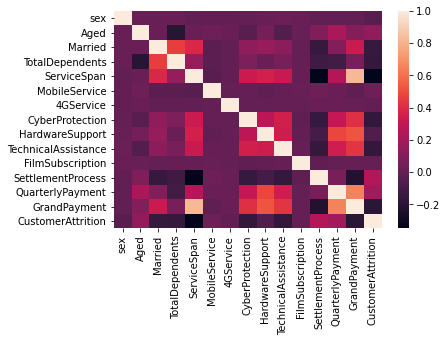

In [105]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [106]:
#dropping due to high magnitude of correlation

train_df.drop(columns=['ServiceSpan'],inplace = True)
test_x.drop(columns=['ServiceSpan'],inplace = True)


In [107]:
train_x = train_df.drop(columns='CustomerAttrition')
train_y = train_df['CustomerAttrition']

In [108]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
train_x, train_y = oversample.fit_resample(train_x, train_y)

c:\Users\singh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


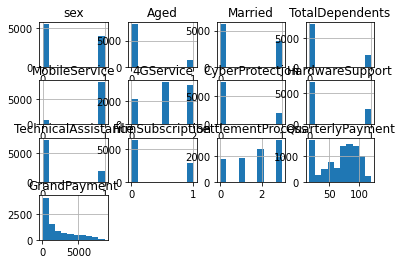

In [109]:
import matplotlib.pyplot as plt

pd.DataFrame(train_x).hist()
plt.show()

In [110]:
train_x.shape

(9316, 13)

In [111]:
from sklearn.model_selection import train_test_split

x_train,x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42, stratify = train_y)


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=1000,random_state=0,min_samples_split=5)
rfc.fit(x_train,y_train)

rfc_pred = rfc.predict(x_valid)
print(classification_report(y_valid,rfc_pred))
print("Random Forest Accuracy: ",accuracy_score(y_valid, rfc_pred))


              precision    recall  f1-score   support

           0       0.82      0.79      0.81       932
           1       0.80      0.83      0.81       932

    accuracy                           0.81      1864
   macro avg       0.81      0.81      0.81      1864
weighted avg       0.81      0.81      0.81      1864

Random Forest Accuracy:  0.8090128755364807


In [113]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.5)
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_valid)

print(classification_report(y_valid,ada_pred))
print("AdaBoostClassifier Accuracy: ",accuracy_score(y_valid, ada_pred))


              precision    recall  f1-score   support

           0       0.82      0.77      0.80       932
           1       0.79      0.83      0.81       932

    accuracy                           0.80      1864
   macro avg       0.80      0.80      0.80      1864
weighted avg       0.80      0.80      0.80      1864

AdaBoostClassifier Accuracy:  0.8036480686695279


In [114]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=500)
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_valid)

print(classification_report(y_valid,gb_pred))
print("GradientBoostingClassifier Accuracy: ",accuracy_score(y_valid, gb_pred))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       932
           1       0.80      0.84      0.82       932

    accuracy                           0.82      1864
   macro avg       0.82      0.82      0.82      1864
weighted avg       0.82      0.82      0.82      1864

GradientBoostingClassifier Accuracy:  0.8175965665236051


In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(2)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_valid)

print(classification_report(y_valid,knn_pred))
print("KNeighborsClassifier Accuracy: ",accuracy_score(y_valid, knn_pred))


              precision    recall  f1-score   support

           0       0.74      0.82      0.78       932
           1       0.80      0.71      0.75       932

    accuracy                           0.77      1864
   macro avg       0.77      0.77      0.76      1864
weighted avg       0.77      0.77      0.76      1864

KNeighborsClassifier Accuracy:  0.7655579399141631


In [116]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=800)
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_valid)

print(classification_report(y_valid,etc_pred))
print("ExtraTreesClassifier Accuracy: ",accuracy_score(y_valid, etc_pred))


              precision    recall  f1-score   support

           0       0.79      0.78      0.78       932
           1       0.78      0.79      0.79       932

    accuracy                           0.79      1864
   macro avg       0.79      0.79      0.79      1864
weighted avg       0.79      0.79      0.79      1864

ExtraTreesClassifier Accuracy:  0.7854077253218884


In [117]:

from catboost import CatBoostClassifier

cbr = CatBoostClassifier(iterations=500,learning_rate=0.5,depth=2)

cbr_pred = cbr.fit(x_train,y_train).predict(x_valid)

print(classification_report(y_valid,cbr_pred))
print("CatBoostClassifier Accuracy: ",accuracy_score(y_valid, cbr_pred, normalize=True, sample_weight=None))


0:	learn: 0.6215984	total: 20.3ms	remaining: 10.1s
1:	learn: 0.5512200	total: 23.2ms	remaining: 5.76s
2:	learn: 0.5278623	total: 25.5ms	remaining: 4.22s
3:	learn: 0.4975364	total: 27.9ms	remaining: 3.46s
4:	learn: 0.4848674	total: 30.1ms	remaining: 2.98s
5:	learn: 0.4738413	total: 32.5ms	remaining: 2.67s
6:	learn: 0.4646872	total: 34.7ms	remaining: 2.45s
7:	learn: 0.4562610	total: 37.1ms	remaining: 2.28s
8:	learn: 0.4477293	total: 41.7ms	remaining: 2.27s
9:	learn: 0.4429899	total: 46.8ms	remaining: 2.29s
10:	learn: 0.4397312	total: 50.5ms	remaining: 2.25s
11:	learn: 0.4363099	total: 53.1ms	remaining: 2.16s
12:	learn: 0.4346372	total: 55.8ms	remaining: 2.09s
13:	learn: 0.4335308	total: 58.2ms	remaining: 2.02s
14:	learn: 0.4308679	total: 61.5ms	remaining: 1.99s
15:	learn: 0.4291935	total: 68.7ms	remaining: 2.08s
16:	learn: 0.4271453	total: 71.2ms	remaining: 2.02s
17:	learn: 0.4247878	total: 73.5ms	remaining: 1.97s
18:	learn: 0.4241247	total: 77.5ms	remaining: 1.96s
19:	learn: 0.4223953	t

In [118]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(random_state = 0,n_estimators=500,learning_rate=0.04)

xgb.fit(x_train,y_train)

y_pred3 = xgb.predict(x_valid)

print("XGB Accuracy: ",100 * accuracy_score(y_valid, y_pred3, normalize=True, sample_weight=None))

[17:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\singh\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB Accuracy:  82.72532188841201


In [119]:
y_pred3

array([0, 1, 0, ..., 0, 1, 0])

In [120]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=5)

y_pred11 = lgbm.fit(x_train,y_train).predict(x_valid)

print("Lightgbm: ",100 * accuracy_score(y_valid, y_pred11, normalize=True, sample_weight=None))

Lightgbm:  82.24248927038627


In [121]:
xgb.fit(train_x,train_y)

[17:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\singh\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
test_x = np.array(test_x)
y_pred = xgb.predict(test_x)

In [123]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [124]:
preds = []
for i in y_pred:
  if i==1:
    preds.append('Yes')
  else:
    preds.append('No')


In [125]:
y = pd.DataFrame()
x = pd.read_csv('test.csv')
y['ID'] = x['ID']
y['CustomerAttrition'] = preds
y

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No
...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,Yes
701,WS1T1FLY87G9A1UNKST4,Yes
702,0XG96FS1KXZSULPSGA1X,Yes
703,YR858QHNQMCDBCT9JRP6,Yes


In [126]:
y.to_csv('XGB.csv')